In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree #used to visualize the decision tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
# print(os.getcwd())

# Decision Trees

Decision Trees are used for classification type problems which have a discrete outcome. Think of:

- Pass/Fail
- Tall/Short
- Default/No-Default
- Approved/Denied


## Background

Decision Trees is a non-parametric model that creates a set of rules based on the observed data to classify outcomes. Intuitively, the algorithm makes a simple decision where to split the data that gives the best classification split. This is repeated across all variables until the data is fully segregated or a training limit is reached.

- Data requires little preparation. No need to Standardize data
  - Can still be done if you are using the same data across different models but understandability is reduced.
- If left uncontrolled, Decision Trees will become complex and lead to overfitting. This will result in poor performance on unseen data.
- Global and stable optimums are not guaranteed, this can result in dramatic differences in performance depending on variations in the training dataset. 

## Study Hours Demo

In [10]:
df = pd.read_csv("ExData\score.csv")
print(df.head())
print(df.describe())

df['outcome'] = np.where(df['Scores'] > 50, 1, 0)
print(df.sort_values(['Hours']).head(20))

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
           Hours     Scores
count  27.000000  27.000000
mean    4.900000  52.259259
std     2.474951  24.720892
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.500000  49.000000
75%     7.150000  75.000000
max     9.200000  95.000000
    Hours  Scores  outcome
14    1.1      17        0
5     1.5      20        0
17    1.9      24        0
0     2.5      21        0
16    2.5      30        0
25    2.5      75        1
20    2.7      30        0
9     2.7      25        0
2     3.2      27        0
13    3.3      42        0
4     3.5      30        0
22    3.8      35        0
26    4.5      49        0
12    4.5      41        0
21    4.8      54        1
1     5.1      47        0
7     5.5      60        1
11    5.9      62        1
18    6.1      67        1
23    6.9      76        1


In [3]:
clf = tree.DecisionTreeClassifier(random_state=0)  # clf for classifier
X = df['Hours'].values.reshape(-1,1)
y = df['outcome'].values
clf.fit(X, y)  # X=predictors, Y=target

DecisionTreeClassifier(random_state=0)

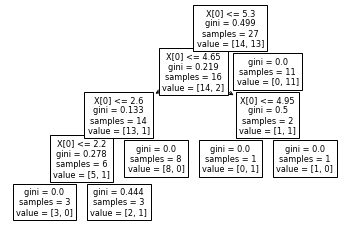

In [4]:
tree.plot_tree(clf)
plt.show()

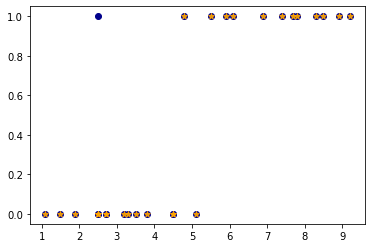

In [5]:
plt.scatter(df['Hours'], df['outcome'], color='darkblue')
plt.scatter(df['Hours'], clf.predict(X), color='orange', marker='*', alpha=0.9)
plt.show()

In orange are the points from the test data points. In dark blue are the actual study hours and their outcomes. Notice that there is only one outlier that would get miss-classified. 
You can see that the model is over fitting, it has fully defined all but one observation. Checking the score, it is almost perfect. If that outlier was not present in the training data, the model in-sample performance would be perfect. 

In [6]:
clf.score(X, y)  # Average Score accuracy

0.9629629629629629

The formula for Accuracy is

$
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
$

TP is True Positives and TN is True Negatives. There are observations that are correctly classified. FP is False Positive, which are observations that are incorrectly predicted as false, and FN is False Negative are observations that are incorrectly predicted as Negative. These can be visualized using the confusion matrix.

In [7]:
confusion_matrix(y, clf.predict(X))  

array([[14,  0],
       [ 1, 12]], dtype=int64)

Confusion Matrix is organized as follows (row is input, column is output):

|           |       |**Predicted**    | **Predicted**   |
|:---------:|:-----:|:---------------:|:---------------:|
|           |       |      **0**      |      **1**      |
| **Actual**| **0** | True Negatives  | False Positives |
| **Actual**| **1** | False Negatives | True Positives  |

- False Negatives are also known as Type II Errors
- False Positives are also known as Type I Errors

Further metrics can be generated for model valuation. When looking along the positive outcome row

- **Precision** is the ratio of true positives (TP) to predicted positives (TP + FP). This tells you how likely the model is to incorrectly generate a false positive.
    - $Precision = \frac{TP}{TP+FP}$
- **Recall** is the ratio of true positives to false negatives (FN) and true positives (TP). This tells you how well the model is to find a positive result.    
    - $Recall = \frac{TP}{TP+FN}$
    - also called "Sensitivity" or "True Positive Rate (TPR)"



In [8]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13

    accuracy                           0.96        27
   macro avg       0.97      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27



Given the simple model, we can visualize the break points of each branch/leaf in the tree. You can see that at the margin, there is no miss classification because the model has enough complexity to add the additional break points.

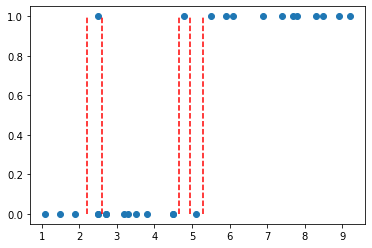

In [9]:
plt.scatter(df['Hours'], df['outcome'])
thresholds = clf.tree_.threshold.copy()
plt.vlines(thresholds[thresholds > 0], ymin=0, ymax=1, colors='red', linestyles="--")
plt.show()

We can reduce the complexity of the model by limiting the depth. This will reduce how many breaks the algorithm can make, reducing the ability to over fit.

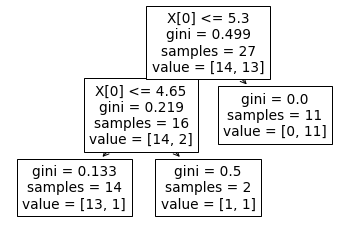

In [10]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=2)  # clf for classifier
clf.fit(X, y)
tree.plot_tree(clf)
plt.show()

In [12]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.85      0.92        13

    accuracy                           0.93        27
   macro avg       0.94      0.92      0.93        27
weighted avg       0.94      0.93      0.93        27



We can see that there is a slight reduction in in-sample performance but the model is less complex. Notice the graph, where the blue dots are the actual results and the orange dots are the predictions. Now there are two passes miss-classified as failures.

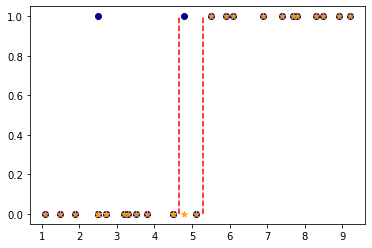

In [11]:
plt.scatter(X, y, color='darkblue', marker='o')
plt.scatter(X, clf.predict(X), color='orange', marker='*', alpha=0.9)
thresholds = clf.tree_.threshold.copy()
plt.vlines(thresholds[thresholds > 0], ymin=0, ymax=1, colors='red', linestyles="--")
plt.show()

Making depth decisions is not efficient and imposes external bias. It is possible to prune the tree, to determine which leafs and branches to remove by looking at which provide the smallest impact to impurity (weakest link). 

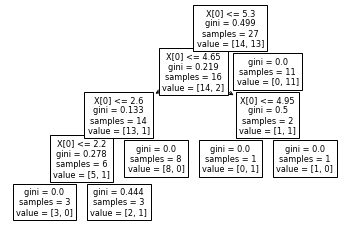

In [12]:
clf = tree.DecisionTreeClassifier(random_state=0)  # clf for classifier
clf.fit(X, y)
tree.plot_tree(clf)
plt.show()

The cost_complexity_pruning_path() function will work through the tree recursively finding a leaf/branch to prune and record the impurity and ccp_alpha at each point. The ccp_alpha can be passed as a parameter to the Decision Tree classifier that will restrict the growth of the tree when it is retrained. 

In [13]:
path = clf.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

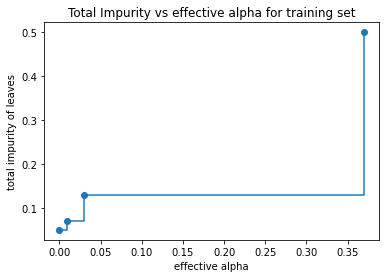

In [14]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas, impurities, marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Notice how as alpha increases the impurity increases. 

Next we will train several classifiers based on different values of ccp_alpha so we can see how they perform.

In [15]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X, y)
    clfs.append(clf)

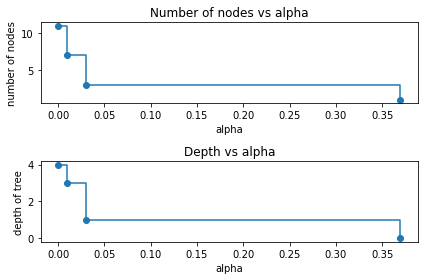

In [16]:
clfs = clfs
ccp_alphas = ccp_alphas

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Notice how as the alpha increases, the number of nodes (leaves) and depth decreases. In this case they are lock step because we only have one variable. Notice how the last model has no depth, this is because it is a very basic classifier that makes no cuts, and is typically ignored during analysis. You can visualize the different break points and trees.

Note that the tree we produce earlier by restricting the depth is not an option. This is because the CCP considers complexity of the model (number of leaves) in it's computation so it was not an efficient tree for it's given complexity. This is why we jump from three cuts to one cut.

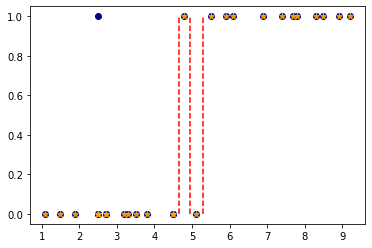

In [17]:
clf = clfs[1]
plt.scatter(X, y, color='darkblue', marker='o')
plt.scatter(X, clf.predict(X), color='orange', marker='*', alpha=0.9)
thresholds = clf.tree_.threshold.copy()
plt.vlines(thresholds[thresholds > 0], ymin=0, ymax=1, colors='red', linestyles="--")
plt.show()

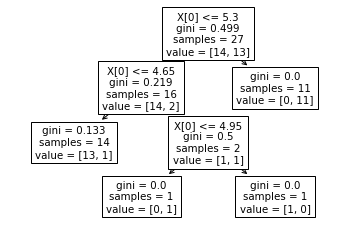

In [18]:
tree.plot_tree(clf)
plt.show()

## Car Purchase Dataset

Going to work through a common EDA on a new dataset to prepare to train a model.

In [11]:
df = pd.read_csv("ExData\car_data.csv")
df = pd.concat([df, pd.get_dummies(df['Gender'])], axis=1)
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased,Female,Male
0,385,Male,35,20000,0,0,1
1,681,Male,40,43500,0,0,1
2,353,Male,49,74000,0,0,1
3,895,Male,40,107500,1,0,1
4,661,Male,25,79000,0,0,1


In [20]:
df.set_index(["User ID"], inplace=True)

In [21]:
df.describe()

,Age,AnnualSalary,Purchased,Female,Male
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.106000,72689.000000,0.402000,0.516000,0.484000
std,10.707073,34488.341867,0.490547,0.499994,0.499994
min,18.000000,15000.000000,0.000000,0.000000,0.000000
25%,32.000000,46375.000000,0.000000,0.000000,0.000000
50%,40.000000,72000.000000,0.000000,1.000000,0.000000
75%,48.000000,90000.000000,1.000000,1.000000,1.000000
max,63.000000,152500.000000,1.000000,1.000000,1.000000


We can get a visual representation of how the data is distributed unconditionally and conditionally based on whether the individual purchased a vehicle or not.

In [13]:
df['[Age','AnnualSalary']].hist(bins=15)

SyntaxError: unmatched ']' (Temp/ipykernel_1860/2400957775.py, line 1)

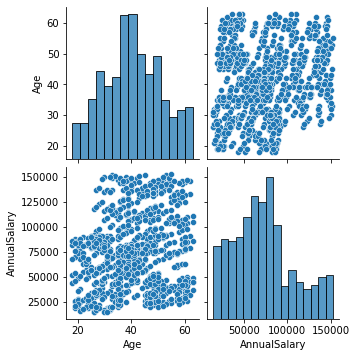

In [22]:
sns.pairplot(df[['Age', 'AnnualSalary']])

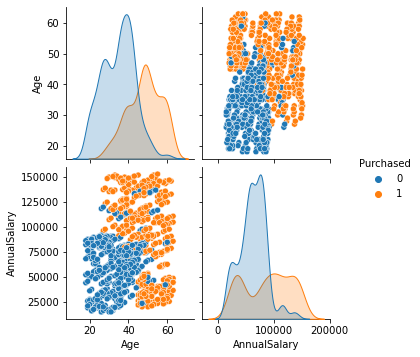

In [23]:
sns.pairplot(df, vars=['Age','AnnualSalary'], hue='Purchased')

Notice that there does appear to be clustering in the data, that individuals who are younger have lower incomes and tend not to purchase. Let's generate a model that uses just the Annual Salary as a predictor because we knew it had issues with Logistic Regression.

In [26]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(df[['AnnualSalary']].values, df['Purchased'].values)

print(clf.score(df[['AnnualSalary']].values, df['Purchased'].values))
print(confusion_matrix(df['Purchased'].values, clf.predict(df[['AnnualSalary']].values)))

0.82
[[545  53]
 [127 275]]


The model is really good with just the Salary data. We don't have the scaling/magnitude issues like we did with logistic regression. Encountering magnitude (numerical) issues will depend on the algorithm and/or solver and there are some issues when it comes to handling training and test data, but those will be discussed in the Model Selection module.

Let's see if Standardizing the data has any impact on performance. 

In [27]:
from sklearn.preprocessing import StandardScaler
df['AnnualSalaryStd'] = StandardScaler().fit_transform(df['AnnualSalary'].values.reshape(-1,1))

In [28]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(df[['AnnualSalaryStd']].values, df['Purchased'].values)

print(clf.score(df[['AnnualSalaryStd']].values, df['Purchased'].values))
print(confusion_matrix(df['Purchased'].values, clf.predict(df[['AnnualSalaryStd']].values)))

0.82
[[545  53]
 [127 275]]


You can see that standardizing salary did not have an impact.

(0.0, 1.0)

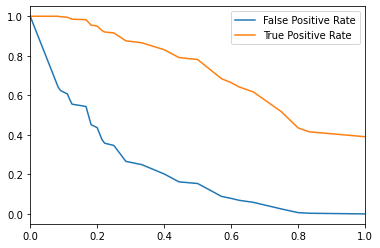

In [29]:
# predict_proba() returns prob=0, prob=1
y_prob = clf.predict_proba(df['AnnualSalaryStd'].values.reshape(-1,1))[:, 1]
fpr, tpr, thresholds = roc_curve(df['Purchased'].values, y_prob)

plt.plot(thresholds, fpr)
plt.plot(thresholds, tpr)
plt.legend(['False Positive Rate', 'True Positive Rate'])
plt.xlim(0,1)  # roc_curve() sets high threshold at y_prob.max() + 1

0.90664986106258


Text(0, 0.5, 'True Positive Rate')

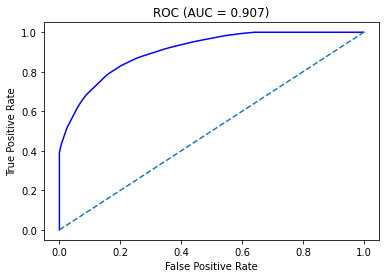

In [30]:
clf_auc = auc(fpr, tpr)
print(clf_auc)

plt.plot(fpr, tpr, color='b')
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), linestyle="--")
plt.title(r"ROC (AUC = {:.3f})".format(clf_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

## Test-Train Split

So far we have been judging performance of the model using the full dataset, however we don't know how well the model performs with unseen data.

We can simulate this by splitting the dataset into two parts, a training dataset which is used to estimate the model parameters and a test dataset that is used the evaluate the model performance.


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df['AnnualSalary'], df['Purchased'], test_size=0.25, random_state=42)

In [33]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train.values.reshape(-1,1), y_train.values)

DecisionTreeClassifier(random_state=0)

We can check in-sample performance and compare to out of sample performance

In [34]:
print(classification_report(y_train.values, clf.predict(X_train.values.reshape(-1,1))))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       460
           1       0.87      0.71      0.78       290

    accuracy                           0.85       750
   macro avg       0.85      0.82      0.83       750
weighted avg       0.85      0.85      0.84       750



In [35]:
print(classification_report(y_test.values, clf.predict(X_test.values.reshape(-1,1))))

              precision    recall  f1-score   support

           0       0.67      0.84      0.75       138
           1       0.72      0.50      0.59       112

    accuracy                           0.69       250
   macro avg       0.70      0.67      0.67       250
weighted avg       0.69      0.69      0.68       250



We can see that the model performance diminishes slightly with the test (unseen) data. This is expected, which is why we test against unseen data to check if the model is over fitted (memorizing).

The splitting is done randomly, so it maybe important that the two datasets are representative of the population. For instance the test data has 44.8% purchases were the training data has 38.7%. This is fairly close, but the model was trained on data with less likelihood of purchases which could bias the training. There is no one-size fits all but things to consider for this particular dataset.

- Think of conditional distribution, are the maintained when split
- Age distribution, Age-AnnualSalary distribution
- Proportion of Female to Male

At a minimum you would want to test different random_seeds to see if the model performance is not heavily tied to a particular train/test split.

Let's use the Alpha Pruning to see if we can improve the over fitting. This will eliminate "weak" terminal leafs from the tree to slowly increase impurity. 

In [36]:
path = clf.cost_complexity_pruning
g_path(X_train.values.reshape(-1,1), y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

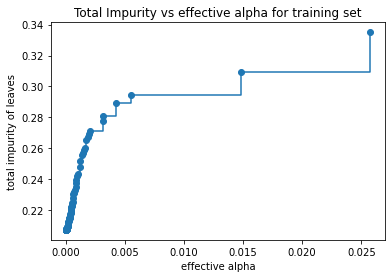

In [37]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [38]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train.values.reshape(-1,1), y_train)
    clfs.append(clf)

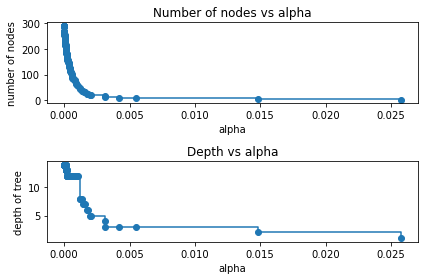

In [39]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

As you can see the change of depth and number of nodes are no longer in lock step. Looking at in-sample performance only provides information on recall, show check against unseen data to determine the value to set ccp_alpha.

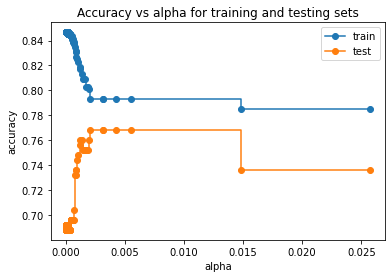

In [40]:
train_scores = [clf.score(X_train.values.reshape(-1,1), y_train) for clf in clfs]
test_scores = [clf.score(X_test.values.reshape(-1,1), y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [41]:
print("Max Accuracy of test data:",max(test_scores))
best_idx = test_scores.index(max(test_scores))
best_idx

Max Accuracy of test data: 0.768


91

In [42]:
ccp_alphas[best_idx]

0.0020266098081023337

In [43]:
clf_model = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alphas[best_idx])
clf_model.fit(X_train.values.reshape(-1,1), y_train)

DecisionTreeClassifier(ccp_alpha=0.0020266098081023337, random_state=0)

In [44]:
print(classification_report(y_test.values, clf_model.predict(X_test.values.reshape(-1,1))))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       138
           1       0.73      0.76      0.75       112

    accuracy                           0.77       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.77      0.77      0.77       250

